In [35]:
# text recognition
import cv2
import pytesseract
# read image
im = cv2.imread('1.jpeg')
# configurations
config = ('-l eng --oem 1 --psm 3')
# pytessercat
text = pytesseract.image_to_string(im, config=config)
# print text
text = text.split('\n')
text

[' ', '', ' ', '', ' ', '', ' ', '\x0c']

In [36]:
# img = cv2.imread('1.jpeg')
# im = cv2.imread('1.jpeg')

In [37]:
# preprocessing
# gray scale
def gray(img):
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# blur
def blur(img) :
    img_blur = cv2.GaussianBlur(img,(5,5),0)
    return img_blur

# threshold
def threshold(img):
    #pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
    img = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)[1]
    return img

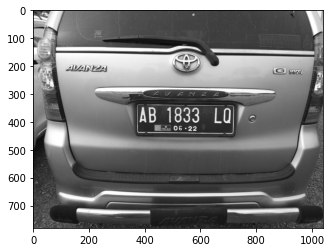

In [38]:
# Menampilkan Gray Image
plt.imshow(cv2.cvtColor(gray(img), cv2.COLOR_BGR2RGB))

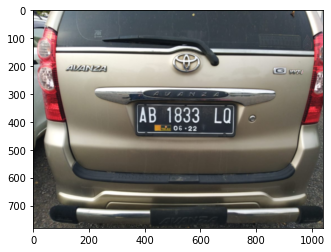

In [39]:
# Menampilkan Gray Image
plt.imshow(cv2.cvtColor(blur(img), cv2.COLOR_BGR2RGB))

In [40]:
# Menampilkan Gray Image
# plt.imshow(cv2.cvtColor(threshold(img), cv2.COLOR_BGR2RGB))

In [41]:
# Finding contours 
im_gray = gray(im)
im_blur = blur(im_gray)
im_thresh = threshold(im_blur)

contours, _ = cv2.findContours(im_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

In [42]:
# text detection
def contours_text(orig, img, contours):
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 

        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 255, 255), 2) 
        
        cv2.imshow('img',rect)
        cv2.waitKey()

        # Cropping the text block for giving input to OCR 
        cropped = orig[y:y + h, x:x + w] 

        # Apply OCR on the cropped image 
        config = ('-l eng --oem 1 --psm 3')
        text = pytesseract.image_to_string(cropped, config=config) 

        print(text)